# Central limit theorem - Python implementation and illustration.

## Description
Here we can start with choosing some theoretical distribution. That can be either discrete value distribution function or continous value distrbution, but in any case, for the illustration purposes we cn chose the distribution which is not resembling completely the normal one. Then we will generate a sample with a size of 1000 values. At the next step will draw a histogram and plot above the theoretical probability density distribution curve of our stochastic variable. Later,we will observe the approximation of out not normal distribution with a normal one, using theoretical mean and dispersion and varying the number of values in the sample.
The objective of all these excercises is to demonstarate and illustrate the entral Limit Theorem, showing that we can approximate well our chosen distribution with a normal one, using its theoretical mean and dispersion.
Author: Daria Shamrai, May 2018.

**The task has been performed within the scope of the assignments of "Python and Mathematics" course at Coursera**

## Distribution chosen is χ2

Distribution $ \chi ^{2} $ (chi-squared) with $k$ degrees of freedom — is the distribution of a sum of the squares of $k$ independent standard normal random variables.

If $ z_{1},\ldots ,z_{k} z_{1},\ldots $,z_{k} — are independent standard normal variables, meaning that: $ z_{i}\sim N(0,1)$. Then a normal variable $x=z_{1}^{2}+\ldots +z_{k}^{2}$ has a chi-squared distribution with $k$ degrees of freedom, meaning $x\sim f_{\chi ^{2}(k)}(x)$, or alternatively: $X=\sum \limits _{i=1}^{k}z_{i}^{2}\sim \chi _{k}^{2}$.

##### Chi-squared distribution is a special caes of Gamma-distribution , and it's density can m=be described as following:
$ f_{\chi ^{2}(k)}(x)\equiv \Gamma \!\left({2},{k \over 2}\right)={\frac {(1/2)^{k \over 2}}{\Gamma \!\left({k \over 2}\right)}}\,x^{{k \over 2}-1}\,e^{-{\frac {x}{2}}}$, where $ \Gamma \!\left(2,{k/2}\right)$ is a Gamma-distribution , and $\Gamma \!\left({k/2}\right)$ — is the Gamma -function.

##### Distribution function is:

$ F_{\chi ^{2}(k)}(x)={\frac {\gamma \left({k \over 2},{x \over 2}\right)}{\Gamma \left({k \over 2}\right)}} $ 


Источник: https://en.wikipedia.org/wiki/Chi-squared_distribution

Text(0.5,0,'$x$')

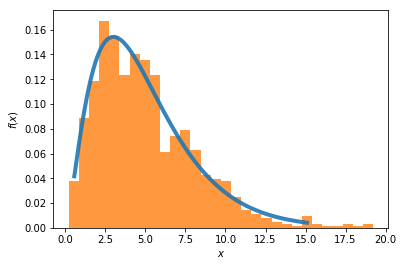

In [1]:
from scipy import stats
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt

k = 5.
#sample of size 1000
x = np.linspace(stats.chi2.ppf(0.01, k), stats.chi2.ppf(0.99, k), 1000)

#plot of the probability density function (pdf) of our Chi-disribution with the given k ( in our case k = 5)
plt.plot(x, stats.chi2.pdf(x, k),'-', lw=4, alpha=0.9, label='chi2 pdf')

#histogram of our 1000 values distribution
plt.hist(stats.chi2.rvs(k, size=1000),30, normed=True, histtype='stepfilled', alpha=0.8)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Estimates of the sample mean
### for sample sizes n = 5 , 10 , 50, 100
### For Chi-squared distribution:

##### Theoretical mean:  $ k$ 
##### Dispersion: 	$2\,k$ , $k>0$ - degrees of freedom


For obtaining the estimate of the normal disribution mean, approximating our Chi-squared distribuition, let's take
$$ \mu= k $$

For obtaining the estimate od the dispersion of the normal distribution  approximating our Chi-squared distribution, let's take:
$$\sigma = \sqrt{{(k*2)/n}}$$

In [4]:
def var_set_plot(n, k):
    avg_values = []
    for i in range(1000):
        avg_values.append(sum(stats.chi2.rvs(k, size=n))/n)

    # calculating the sample mean and sigma 
    DXn = (2*k)/n
    sigma_n = math.sqrt(DXn)


    # seting a normally distributed value with our calcualted theoretical mean and sigma
    norm_rv = stats.norm(k, scale=sigma_n)

    #plot the histogram and probability density fucnction for a given n
    
    plt.hist(avg_values,30, normed=True, histtype='stepfilled', alpha=0.8)
    plt.plot(x, norm_rv.pdf(x),'-', lw=2, alpha=0.9)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend([u'Normal distribution pdf', u' histogram n= '+ str(n)])
    

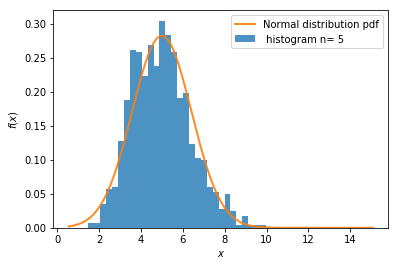

In [5]:
var_set_plot(5,k)

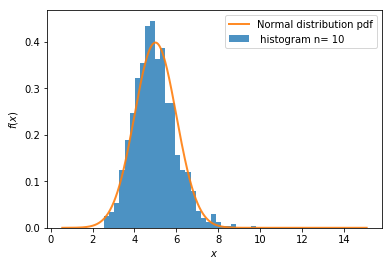

In [6]:
var_set_plot(10,k)

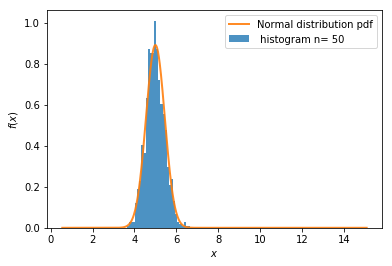

In [7]:
var_set_plot(50,k)

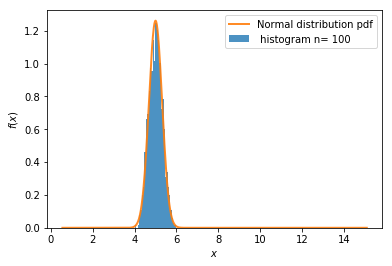

In [8]:
var_set_plot(100,k)

## Some observations and conclusions.

we can clearly observe that with the increase of n ( sample size) the distribution fo the sample values gets more and more close to the normal distribution with a theoetical mean dna sigma of our initially chosen distribution Chi-squared. it is also possible to say that the accuracy ( quality ) of approximation of the distribution with normal one increases at the sample size increase. Also, one more thing we can observe clearly, that with the sample size growth, while keeping the same mean value, thedespercion of the sample decreases.